Load in Pandas and Connect to SVV

In [1]:
import pandas as pd

In [2]:
svv_credentials = open('svv_creds.json.txt').read()
import json
svv_creds = json.loads(svv_credentials)

In [3]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

Query the top 100,000 rows from the core.viewer table

In [4]:
query_data = "Select TOP 100000 * from core.viewer"

df_viewer = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data)
    
    colnames = [desc[0] for desc in cur.description]
    df_viewer = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

Check the DataFrame

In [5]:
df_viewer.head()

,viewer_id,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
0,00000c0a-6414-4f12-8381-91deca1b3c17,Mr,False,True,iOS,2018-07-03 18:16:33.165,1999-03-19,NaN,M,20.0,...,Inactive,2019-07-03 05:52:56,NaT,NaT,NaT,NaT,None,full,HG50DP,386a1d6d827c3e82035898c5a313d9e4389f6713069019...
1,00001f43-49c4-4198-acfb-2e16846129af,Mr,True,False,unknown,2015-09-26 16:27:13.494,1944-10-25,44877545.0,M,74.0,...,Active,2019-06-26 05:01:12,NaT,NaT,NaT,NaT,None,full,BN189DH,1025b1445648366b1ad970c85c78b486d56d29579a8da4...
2,0000573b-5b7f-45e9-8cd1-a614c18a2608,Mrs,False,False,playerBrowser,2016-05-26 14:08:42.848,1961-04-04,NaN,F,58.0,...,Inactive,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,BT307LS,43dcb4a7e1efdf17d93bf6895b599c09fc95a31d575d9b...
3,0000bb90-c585-4b5f-ab4b-3e2ac7f45379,Miss,False,False,playerBrowser,2016-06-11 19:06:08.074,1911-12-31,NaN,F,107.0,...,Inactive,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,NR31EH,75a2722bd19c36c2c36e0e65f9e881553016940184bb02...
4,0000feab-468b-4110-900b-56d4f7d997ca,Miss,False,False,iOS,2017-07-08 18:13:03.896,2000-06-02,NaN,F,19.0,...,Inactive,2019-07-08 05:01:47,NaT,NaT,NaT,NaT,None,full,BT399TS,f23745cb85db412b6ef184ca6722d60b483ef0a5cd5c47...


Set the Index as viewer_id

In [6]:
df_viewer.set_index('viewer_id', inplace = True)
df_viewer.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000c0a-6414-4f12-8381-91deca1b3c17,Mr,False,True,iOS,2018-07-03 18:16:33.165,1999-03-19,NaN,M,20.0,None,...,Inactive,2019-07-03 05:52:56,NaT,NaT,NaT,NaT,None,full,HG50DP,386a1d6d827c3e82035898c5a313d9e4389f6713069019...
00001f43-49c4-4198-acfb-2e16846129af,Mr,True,False,unknown,2015-09-26 16:27:13.494,1944-10-25,44877545.0,M,74.0,None,...,Active,2019-06-26 05:01:12,NaT,NaT,NaT,NaT,None,full,BN189DH,1025b1445648366b1ad970c85c78b486d56d29579a8da4...
0000573b-5b7f-45e9-8cd1-a614c18a2608,Mrs,False,False,playerBrowser,2016-05-26 14:08:42.848,1961-04-04,NaN,F,58.0,None,...,Inactive,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,BT307LS,43dcb4a7e1efdf17d93bf6895b599c09fc95a31d575d9b...
0000bb90-c585-4b5f-ab4b-3e2ac7f45379,Miss,False,False,playerBrowser,2016-06-11 19:06:08.074,1911-12-31,NaN,F,107.0,None,...,Inactive,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,NR31EH,75a2722bd19c36c2c36e0e65f9e881553016940184bb02...
0000feab-468b-4110-900b-56d4f7d997ca,Miss,False,False,iOS,2017-07-08 18:13:03.896,2000-06-02,NaN,F,19.0,None,...,Inactive,2019-07-08 05:01:47,NaT,NaT,NaT,NaT,None,full,BT399TS,f23745cb85db412b6ef184ca6722d60b483ef0a5cd5c47...


Add another column to count the number of Null entries per. row

In [7]:
df_viewer['number_of_nulls'] = df_viewer.shape[1] - df_viewer.count(axis = 1)
df_viewer.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email,number_of_nulls
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000c0a-6414-4f12-8381-91deca1b3c17,Mr,False,True,iOS,2018-07-03 18:16:33.165,1999-03-19,NaN,M,20.0,None,...,2019-07-03 05:52:56,NaT,NaT,NaT,NaT,None,full,HG50DP,386a1d6d827c3e82035898c5a313d9e4389f6713069019...,13
00001f43-49c4-4198-acfb-2e16846129af,Mr,True,False,unknown,2015-09-26 16:27:13.494,1944-10-25,44877545.0,M,74.0,None,...,2019-06-26 05:01:12,NaT,NaT,NaT,NaT,None,full,BN189DH,1025b1445648366b1ad970c85c78b486d56d29579a8da4...,12
0000573b-5b7f-45e9-8cd1-a614c18a2608,Mrs,False,False,playerBrowser,2016-05-26 14:08:42.848,1961-04-04,NaN,F,58.0,None,...,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,BT307LS,43dcb4a7e1efdf17d93bf6895b599c09fc95a31d575d9b...,13
0000bb90-c585-4b5f-ab4b-3e2ac7f45379,Miss,False,False,playerBrowser,2016-06-11 19:06:08.074,1911-12-31,NaN,F,107.0,None,...,2019-07-02 15:47:52,NaT,NaT,NaT,NaT,None,full,NR31EH,75a2722bd19c36c2c36e0e65f9e881553016940184bb02...,13
0000feab-468b-4110-900b-56d4f7d997ca,Miss,False,False,iOS,2017-07-08 18:13:03.896,2000-06-02,NaN,F,19.0,None,...,2019-07-08 05:01:47,NaT,NaT,NaT,NaT,None,full,BT399TS,f23745cb85db412b6ef184ca6722d60b483ef0a5cd5c47...,13


Create a new DataFrame containing just the 'Number of Nulls' column

In [8]:
df_reduced = df_viewer.loc[:,['number_of_nulls']]
df_reduced.head()

,number_of_nulls
viewer_id,
00000c0a-6414-4f12-8381-91deca1b3c17,13
00001f43-49c4-4198-acfb-2e16846129af,12
0000573b-5b7f-45e9-8cd1-a614c18a2608,13
0000bb90-c585-4b5f-ab4b-3e2ac7f45379,13
0000feab-468b-4110-900b-56d4f7d997ca,13


Generate a Histogram of the distribution of the number of Nulls

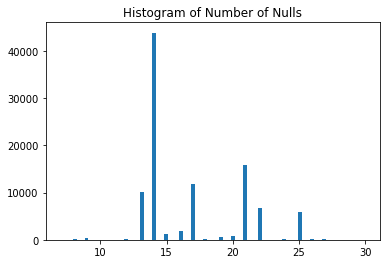

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(df_reduced['number_of_nulls'], bins = 'auto')
plt.title("Histogram of Number of Nulls")
plt.show()

Now do the same process with a random 100,000 sample from core.viewer

In [10]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

In [11]:
query_data = "SELECT * FROM core.viewer ORDER BY md5('seed' || viewer_id) LIMIT 100000"

df_viewer_random = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data)
    
    colnames = [desc[0] for desc in cur.description]
    df_viewer_random = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

In [12]:
df_viewer_random.head()

,viewer_id,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
0,96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None
1,518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None
2,cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,...,Inactive,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None
3,7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,...,Inactive,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None
4,bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None


In [13]:
df_viewer_random.set_index('viewer_id', inplace = True)
df_viewer_random.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
viewer_id,,,,,,,,,,,,,,,,,,,,,
96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None
518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None
cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,None,...,Inactive,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,None,...,Inactive,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None


In [14]:
df_viewer_random['number_of_nulls'] = df_viewer_random.shape[1] - df_viewer_random.count(axis = 1)
df_viewer_random.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email,number_of_nulls
viewer_id,,,,,,,,,,,,,,,,,,,,,
96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None,9
518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None,8
cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,None,...,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None,14
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None,9
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None,9


In [15]:
df_reduced_random = df_viewer_random.loc[:,['number_of_nulls']]
df_reduced_random.head()

,number_of_nulls
viewer_id,
96240843-4d45-448e-9500-1e88f715d127,9
518b1b40-18ce-4e37-8970-60f9ace809bf,8
cf988b4a-b228-48f9-97f8-8da02a86d920,14
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,9
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,9


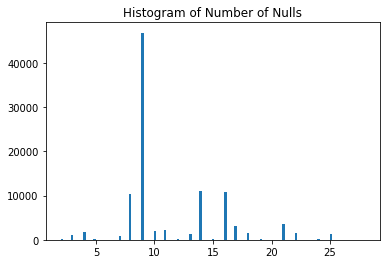

In [16]:
plt.hist(df_reduced_random['number_of_nulls'], bins = 'auto')
plt.title("Histogram of Number of Nulls")
plt.show()

In [17]:
df_viewer_random.isna().sum()

title                                   17344
email_verified                            131
email_optin_at_time_of_registration       143
registration_source                       128
created                                     0
date_of_birth                           21690
ssoid                                   93466
gender                                    131
age                                     21690
last_updated                           100000
tenure                                      0
allow_profiling                           131
allow_modelling                        100000
barb                                       54
indicia_group                            1325
indicia_match_type                          4
indicia_postal_district                 20857
indicia_town                            20857
first_production_id_viewed              23806
first_viewed_date                       21700
last_production_id_viewed               22311
last_viewed_date                  

Now try some Experian data

In [18]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

In [19]:
query_data = '''SELECT * FROM (SELECT viewer_id FROM core.viewer ORDER BY md5('seed' || viewer_id) LIMIT 100000) a 
                JOIN ap.thirty_six_month_active t ON a.viewer_id = t.viewer_id'''

df_viewer_experian = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data)
    
    colnames = [desc[0] for desc in cur.description]
    df_viewer_experian = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

In [20]:
df_viewer_experian.head()

,viewer_id,viewer_id,match_level,postcode_match,last_active_3_months,last_active_36_months,h_month_appeared,h_prospect_family_count,h_prospect_household_count,h_residential_property_value,...,p_0827_band_when_applying_for_savings_products_i_use_financial_advisor_v1a,p_0828_band_when_applying_for_savings_products_i_use_branch_v1a,p_0829_band_when_applying_for_mortgages_i_use_banking_websites_v1a,p_0830_band_when_applying_for_mortgages_i_use_online_aggregator_v1a,p_0831_band_when_applying_for_mortgages_i_use_financial_advisor_v1a,p_0832_band_when_applying_for_mortgages_i_use_branch_v1a,p_0833_band_when_applying_for_credit_cards_i_use_banking_websites_v1a,p_0834_band_when_applying_for_credit_cards_i_use_online_aggregator_v1a,p_0835_band_when_applying_for_credit_cards_i_use_branch_v1a,p_0836_band_when_applying_for_credit_cards_i_use_phone_v1a
0,0018584e-0303-4ffe-ab54-82b23422916e,0018584e-0303-4ffe-ab54-82b23422916e,0,1,0,1,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,3,1,1,1,12,1,1.0,209468.0,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
2,00267123-9e30-4071-a49b-0bc734c40472,00267123-9e30-4071-a49b-0bc734c40472,4,1,1,1,10,2,2.0,510915.0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,0031731d-e20f-4cda-b470-eb4a95ccfa4d,0031731d-e20f-4cda-b470-eb4a95ccfa4d,1,1,1,1,03,1,1.0,457417.0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,003f9551-2c45-43a7-991a-a3e059004713,003f9551-2c45-43a7-991a-a3e059004713,0,1,0,1,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_viewer_experian = df_viewer_experian.loc[:,~df_viewer_experian.columns.duplicated()]
df_viewer_experian.head()

,viewer_id,match_level,postcode_match,last_active_3_months,last_active_36_months,h_month_appeared,h_prospect_family_count,h_prospect_household_count,h_residential_property_value,h_year_appeared,...,p_0827_band_when_applying_for_savings_products_i_use_financial_advisor_v1a,p_0828_band_when_applying_for_savings_products_i_use_branch_v1a,p_0829_band_when_applying_for_mortgages_i_use_banking_websites_v1a,p_0830_band_when_applying_for_mortgages_i_use_online_aggregator_v1a,p_0831_band_when_applying_for_mortgages_i_use_financial_advisor_v1a,p_0832_band_when_applying_for_mortgages_i_use_branch_v1a,p_0833_band_when_applying_for_credit_cards_i_use_banking_websites_v1a,p_0834_band_when_applying_for_credit_cards_i_use_online_aggregator_v1a,p_0835_band_when_applying_for_credit_cards_i_use_branch_v1a,p_0836_band_when_applying_for_credit_cards_i_use_phone_v1a
0,0018584e-0303-4ffe-ab54-82b23422916e,0,1,0,1,None,None,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,3,1,1,1,12,1,1.0,209468.0,2008,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
2,00267123-9e30-4071-a49b-0bc734c40472,4,1,1,1,10,2,2.0,510915.0,2003,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,0031731d-e20f-4cda-b470-eb4a95ccfa4d,1,1,1,1,03,1,1.0,457417.0,1994,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,003f9551-2c45-43a7-991a-a3e059004713,0,1,0,1,None,None,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_viewer_experian.set_index('viewer_id', inplace = True)
df_viewer_experian.head()

,match_level,postcode_match,last_active_3_months,last_active_36_months,h_month_appeared,h_prospect_family_count,h_prospect_household_count,h_residential_property_value,h_year_appeared,p_gender,...,p_0827_band_when_applying_for_savings_products_i_use_financial_advisor_v1a,p_0828_band_when_applying_for_savings_products_i_use_branch_v1a,p_0829_band_when_applying_for_mortgages_i_use_banking_websites_v1a,p_0830_band_when_applying_for_mortgages_i_use_online_aggregator_v1a,p_0831_band_when_applying_for_mortgages_i_use_financial_advisor_v1a,p_0832_band_when_applying_for_mortgages_i_use_branch_v1a,p_0833_band_when_applying_for_credit_cards_i_use_banking_websites_v1a,p_0834_band_when_applying_for_credit_cards_i_use_online_aggregator_v1a,p_0835_band_when_applying_for_credit_cards_i_use_branch_v1a,p_0836_band_when_applying_for_credit_cards_i_use_phone_v1a
viewer_id,,,,,,,,,,,,,,,,,,,,,
0018584e-0303-4ffe-ab54-82b23422916e,0,1,0,1,None,None,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,3,1,1,1,12,1,1.0,209468.0,2008,0,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
00267123-9e30-4071-a49b-0bc734c40472,4,1,1,1,10,2,2.0,510915.0,2003,1,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0031731d-e20f-4cda-b470-eb4a95ccfa4d,1,1,1,1,03,1,1.0,457417.0,1994,1,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
003f9551-2c45-43a7-991a-a3e059004713,0,1,0,1,None,None,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_viewer_experian['number_of_nulls'] = df_viewer_random.shape[1] - df_viewer_random.count(axis = 1)
df_viewer_experian.head()

,match_level,postcode_match,last_active_3_months,last_active_36_months,h_month_appeared,h_prospect_family_count,h_prospect_household_count,h_residential_property_value,h_year_appeared,p_gender,...,p_0828_band_when_applying_for_savings_products_i_use_branch_v1a,p_0829_band_when_applying_for_mortgages_i_use_banking_websites_v1a,p_0830_band_when_applying_for_mortgages_i_use_online_aggregator_v1a,p_0831_band_when_applying_for_mortgages_i_use_financial_advisor_v1a,p_0832_band_when_applying_for_mortgages_i_use_branch_v1a,p_0833_band_when_applying_for_credit_cards_i_use_banking_websites_v1a,p_0834_band_when_applying_for_credit_cards_i_use_online_aggregator_v1a,p_0835_band_when_applying_for_credit_cards_i_use_branch_v1a,p_0836_band_when_applying_for_credit_cards_i_use_phone_v1a,number_of_nulls
viewer_id,,,,,,,,,,,,,,,,,,,,,
0018584e-0303-4ffe-ab54-82b23422916e,0,1,0,1,None,None,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,3,1,1,1,12,1,1.0,209468.0,2008,0,...,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,8
00267123-9e30-4071-a49b-0bc734c40472,4,1,1,1,10,2,2.0,510915.0,2003,1,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8
0031731d-e20f-4cda-b470-eb4a95ccfa4d,1,1,1,1,03,1,1.0,457417.0,1994,1,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8
003f9551-2c45-43a7-991a-a3e059004713,0,1,0,1,None,None,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


In [24]:
df_reduced_experian = df_viewer_experian.loc[:,['number_of_nulls']]
df_reduced_experian.head()

,number_of_nulls
viewer_id,
0018584e-0303-4ffe-ab54-82b23422916e,8
001aaf90-6d3c-4fea-8a34-1463b7e7bcf8,8
00267123-9e30-4071-a49b-0bc734c40472,8
0031731d-e20f-4cda-b470-eb4a95ccfa4d,8
003f9551-2c45-43a7-991a-a3e059004713,13


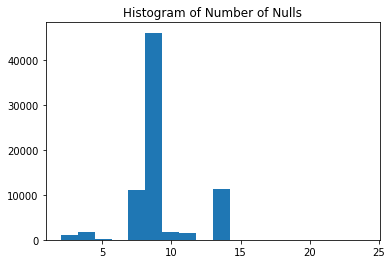

In [25]:
plt.hist(df_reduced_experian['number_of_nulls'], bins = 'auto')
plt.title("Histogram of Number of Nulls")
plt.show()

In [26]:
df_viewer_experian.isna().sum()

match_level                                                                                      0
postcode_match                                                                                   0
last_active_3_months                                                                             0
last_active_36_months                                                                            0
h_month_appeared                                                                             24254
h_prospect_family_count                                                                      24254
h_prospect_household_count                                                                   24254
h_residential_property_value                                                                 24254
h_year_appeared                                                                              24254
p_gender                                                                                     24254
p_month_ap

In [27]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

In [28]:
query_data = "SELECT * FROM core.viewer WHERE LEN(viewer_id) = 36 ORDER BY md5('seed' || viewer_id) LIMIT 100000"

df_viewer_length_random = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data)
    
    colnames = [desc[0] for desc in cur.description]
    df_viewer_length_random = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

In [29]:
df_viewer_length_random.head()

,viewer_id,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
0,96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None
1,518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None
2,cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,...,Inactive,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None
3,7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,...,Inactive,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None
4,bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None


In [30]:
df_viewer_length_random.set_index('viewer_id', inplace = True)
df_viewer_length_random.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,lifestage,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email
viewer_id,,,,,,,,,,,,,,,,,,,,,
96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None
518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None
cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,None,...,Inactive,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,None,...,Inactive,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,None,...,Active,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None


In [31]:
df_viewer_length_random['number_of_nulls'] = df_viewer_length_random.shape[1] - df_viewer_length_random.count(axis = 1)
df_viewer_length_random.head()

,title,email_verified,email_optin_at_time_of_registration,registration_source,created,date_of_birth,ssoid,gender,age,last_updated,...,last_update_utc,first_entitlement_start_date,first_entitlement_end_date,latest_entitlement_start_date,latest_entitlement_end_date,entitlement_status,ad_consent,postcode,hashed_email,number_of_nulls
viewer_id,,,,,,,,,,,,,,,,,,,,,
96240843-4d45-448e-9500-1e88f715d127,Mrs,False,False,Android,2017-04-30 22:25:19.537,1991-09-05,NaN,F,27.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,WS109SY,None,9
518b1b40-18ce-4e37-8970-60f9ace809bf,Miss,True,True,unknown,2015-04-27 18:55:32.634,1977-09-25,42361433.0,F,41.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,SW164EH,None,8
cf988b4a-b228-48f9-97f8-8da02a86d920,Mr,False,False,playerBrowser,2018-06-15 19:27:30.479,1986-03-13,NaN,M,33.0,None,...,2019-06-15 06:05:20,NaT,NaT,NaT,NaT,None,full,Eh14 1xr,None,14
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,Ms,False,False,playerBrowser,2015-04-20 21:37:20.383,1968-08-10,NaN,F,50.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,BT82 9TN,None,9
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,Miss,True,False,iOS,2016-06-09 20:40:26.899,1961-05-17,NaN,F,58.0,None,...,2019-08-02 05:18:21,NaT,NaT,NaT,NaT,None,full,DE137JP,None,9


In [32]:
df_reduced_length = df_viewer_length_random.loc[:,['number_of_nulls']]
df_reduced_length.head()

,number_of_nulls
viewer_id,
96240843-4d45-448e-9500-1e88f715d127,9
518b1b40-18ce-4e37-8970-60f9ace809bf,8
cf988b4a-b228-48f9-97f8-8da02a86d920,14
7e4b1d2f-2f47-49b2-9ac6-fa73058f442a,9
bdeb9ce7-d6b5-4855-87e3-a4366454dd40,9


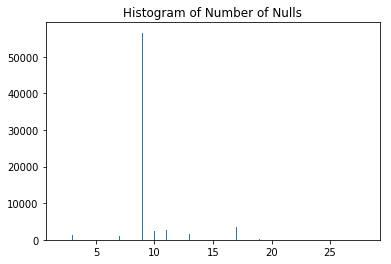

In [33]:
##import matplotlib.pyplot as plt
##% matplotlib inline

plt.hist(df_reduced_length['number_of_nulls'], bins = 'auto')
plt.title("Histogram of Number of Nulls")
plt.show()

In [34]:
df_viewer_length_random.isna().sum()

title                                     142
email_verified                            146
email_optin_at_time_of_registration       147
registration_source                       143
created                                     0
date_of_birth                            5385
ssoid                                   92050
gender                                    146
age                                      5385
last_updated                           100000
tenure                                      0
allow_profiling                           146
allow_modelling                        100000
barb                                       43
indicia_group                              45
indicia_match_type                          1
indicia_postal_district                  4405
indicia_town                             4405
first_production_id_viewed              22106
first_viewed_date                       20292
last_production_id_viewed               20528
last_viewed_date                  

The largest nulls in this case are: Last Updated, Allow Profiling (everyone), Hub+ data (96%), ssoid (92%) and Hashed E-Mail (88%)

In [35]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

In [36]:
query_data = "SELECT * FROM sandbox.rw_gender_experian_validation"

df_gender = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data)
    
    colnames = [desc[0] for desc in cur.description]
    df_gender = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

In [37]:
df_gender.head()

,viewer_id,gender,e_gender
0,6037b201-fe57-4ce3-984b-454a6e0d5b4c,F,F
1,680f76a9-20ce-45fa-b8b5-be8cca6c5881,F,None
2,774ce3d3-b200-4521-bc16-9ecfa88dfeeb,F,F
3,bf65cc95-cfd9-47ab-8d6c-605e6795641c,F,None
4,d2012ff4-6d66-4041-907e-dd76d6edf355,M,M


In [38]:
df_gender.dtypes

viewer_id    object
gender       object
e_gender     object
dtype: object

In [39]:
import numpy as np

df_gender['same'] = np.where(df_gender['gender'] == df_gender['e_gender'], 1, 0)
df_gender.head()

,viewer_id,gender,e_gender,same
0,6037b201-fe57-4ce3-984b-454a6e0d5b4c,F,F,1
1,680f76a9-20ce-45fa-b8b5-be8cca6c5881,F,None,0
2,774ce3d3-b200-4521-bc16-9ecfa88dfeeb,F,F,1
3,bf65cc95-cfd9-47ab-8d6c-605e6795641c,F,None,0
4,d2012ff4-6d66-4041-907e-dd76d6edf355,M,M,1


In [ ]:
df_gender.dtypes

In [ ]:
df_gender.sum(axis = 0, skipna = True)